## Trial of Time Series Analysis by Tensorflow Probability
#### Based on https://bayesiancomputationbook.com/notebooks/chp_06.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow_probability as tfp

In [51]:
import tensorflow as tf

In [59]:
import arviz as az

In [2]:
co2_by_month = pd.read_csv("../data/monthly_mauna_loa_co2_20220721.csv", comment='#')

In [3]:
co2_by_month

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
767,2022,2,2022.1250,419.28,418.32,27,0.92,0.34
768,2022,3,2022.2083,418.81,417.33,30,0.78,0.27
769,2022,4,2022.2917,420.23,417.56,28,0.85,0.31
770,2022,5,2022.3750,420.99,417.60,30,0.76,0.27


In [4]:
co2_by_month['day'] = 0

In [5]:
co2_by_month

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,day
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,0
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,0
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,0
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,0
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,0
...,...,...,...,...,...,...,...,...,...
767,2022,2,2022.1250,419.28,418.32,27,0.92,0.34,0
768,2022,3,2022.2083,418.81,417.33,30,0.78,0.27,0
769,2022,4,2022.2917,420.23,417.56,28,0.85,0.31,0
770,2022,5,2022.3750,420.99,417.60,30,0.76,0.27,0


In [8]:
co2_by_month['year_string'] = co2_by_month['year'].astype(str)

In [9]:
co2_by_month['month_string'] = co2_by_month['month'].astype(str)

In [10]:
co2_by_month

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,day,year_string,month_string
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,0,1958,3
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,0,1958,4
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,0,1958,5
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,0,1958,6
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,0,1958,7
...,...,...,...,...,...,...,...,...,...,...,...
767,2022,2,2022.1250,419.28,418.32,27,0.92,0.34,0,2022,2
768,2022,3,2022.2083,418.81,417.33,30,0.78,0.27,0,2022,3
769,2022,4,2022.2917,420.23,417.56,28,0.85,0.31,0,2022,4
770,2022,5,2022.3750,420.99,417.60,30,0.76,0.27,0,2022,5


In [11]:
co2_by_month['date_month'] = pd.to_datetime(co2_by_month['year_string'] + '/' + co2_by_month['month_string'])

In [12]:
co2_by_month

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,day,year_string,month_string,date_month
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,0,1958,3,1958-03-01
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,0,1958,4,1958-04-01
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,0,1958,5,1958-05-01
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,0,1958,6,1958-06-01
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,0,1958,7,1958-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
767,2022,2,2022.1250,419.28,418.32,27,0.92,0.34,0,2022,2,2022-02-01
768,2022,3,2022.2083,418.81,417.33,30,0.78,0.27,0,2022,3,2022-03-01
769,2022,4,2022.2917,420.23,417.56,28,0.85,0.31,0,2022,4,2022-04-01
770,2022,5,2022.3750,420.99,417.60,30,0.76,0.27,0,2022,5,2022-05-01


In [13]:
co2_by_month.set_index('date_month', drop=True, inplace=True)

In [14]:
co2_by_month

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,day,year_string,month_string
date_month,,,,,,,,,,,
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99,0,1958,3
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,0,1958,4
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99,0,1958,5
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99,0,1958,6
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99,0,1958,7
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,2022,2,2022.1250,419.28,418.32,27,0.92,0.34,0,2022,2
2022-03-01,2022,3,2022.2083,418.81,417.33,30,0.78,0.27,0,2022,3
2022-04-01,2022,4,2022.2917,420.23,417.56,28,0.85,0.31,0,2022,4


In [15]:
co2_by_month.drop(columns=['year', 'month', 'day', 'year_string', 'month_string'], inplace=True)

In [16]:
co2_by_month

,decimal date,average,deseasonalized,ndays,sdev,unc
date_month,,,,,,
1958-03-01,1958.2027,315.70,314.43,-1,-9.99,-0.99
1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05-01,1958.3699,317.51,314.71,-1,-9.99,-0.99
1958-06-01,1958.4548,317.24,315.14,-1,-9.99,-0.99
1958-07-01,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...
2022-02-01,2022.1250,419.28,418.32,27,0.92,0.34
2022-03-01,2022.2083,418.81,417.33,30,0.78,0.27
2022-04-01,2022.2917,420.23,417.56,28,0.85,0.31


In [17]:
co2_by_month['CO2'] = co2_by_month['average'].astype(np.float32)

In [18]:
co2_by_month

,decimal date,average,deseasonalized,ndays,sdev,unc,CO2
date_month,,,,,,,
1958-03-01,1958.2027,315.70,314.43,-1,-9.99,-0.99,315.700012
1958-04-01,1958.2877,317.45,315.16,-1,-9.99,-0.99,317.450012
1958-05-01,1958.3699,317.51,314.71,-1,-9.99,-0.99,317.510010
1958-06-01,1958.4548,317.24,315.14,-1,-9.99,-0.99,317.239990
1958-07-01,1958.5370,315.86,315.18,-1,-9.99,-0.99,315.859985
...,...,...,...,...,...,...,...
2022-02-01,2022.1250,419.28,418.32,27,0.92,0.34,419.279999
2022-03-01,2022.2083,418.81,417.33,30,0.78,0.27,418.809998
2022-04-01,2022.2917,420.23,417.56,28,0.85,0.31,420.230011


In [35]:
type(co2_by_month['average'].iloc[0])

numpy.float64

In [36]:
type(co2_by_month['CO2'].iloc[0])

numpy.float32

In [20]:
num_forecast_steps = 12 * 10 # Forecast the final ten years

In [82]:
co2_by_month.drop(columns=['decimal date', 'average', 'deseasonalized', 'ndays', 'sdev', 'unc'], inplace=True)

In [83]:
co2_by_month

,CO2
date_month,
1958-03-01,315.700012
1958-04-01,317.450012
1958-05-01,317.510010
1958-06-01,317.239990
1958-07-01,315.859985
...,...
2022-02-01,419.279999
2022-03-01,418.809998
2022-04-01,420.230011


In [84]:
co2_by_month_training_data = co2_by_month[:-num_forecast_steps]

In [85]:
co2_by_month_testing_data = co2_by_month[-num_forecast_steps:]

### co2_by_month plot

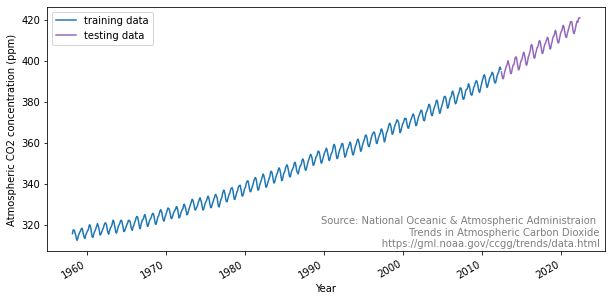

In [86]:
def plot_co2_data(fig_ax=None):
    if not fig_ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig, ax = fig_ax
    ax.plot(co2_by_month_training_data, label="training data")
    ax.plot(co2_by_month_testing_data, color="C4", label="testing data")
    ax.legend()
    ax.set(
        ylabel="Atmospheric CO2 concentration (ppm)",
        xlabel="Year"
    )
    ax.text(0.99, .02,
              """Source: National Oceanic & Atmospheric Administraion 
                         Trends in Atmospheric Carbon Dioxide
              https://gml.noaa.gov/ccgg/trends/data.html""",
              transform=ax.transAxes,
              horizontalalignment="right",
              alpha=0.5)
    fig.autofmt_xdate()
    return fig, ax

_ = plot_co2_data()
plt.savefig("../plots/fig1_co2_by_month.png")

### generate_design_matrix

In [87]:
np.linspace(0., 1., len(co2_by_month)).shape

(772,)

In [88]:
trend_all = np.linspace(0., 1., len(co2_by_month))[..., None]

In [89]:
trend_all.shape

(772, 1)

In [90]:
trend_all[:10]

array([[0.        ],
       [0.00129702],
       [0.00259403],
       [0.00389105],
       [0.00518807],
       [0.00648508],
       [0.0077821 ],
       [0.00907912],
       [0.01037613],
       [0.01167315]])

In [91]:
type(trend_all[0, 0])

numpy.float64

In [92]:
trend_all = trend_all.astype(np.float32)

In [93]:
type(trend_all[0, 0])

numpy.float32

In [94]:
trend = trend_all[:-num_forecast_steps, :]

In [95]:
co2_by_month.index.month

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
            ...
             9, 10, 11, 12,  1,  2,  3,  4,  5,  6],
           dtype='int64', name='date_month', length=772)

In [96]:
pd.get_dummies(co2_by_month.index.month)

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
767,0,1,0,0,0,0,0,0,0,0,0,0
768,0,0,1,0,0,0,0,0,0,0,0,0
769,0,0,0,1,0,0,0,0,0,0,0,0
770,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:
pd.get_dummies(co2_by_month.index.month).values

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [98]:
seasonality_all = pd.get_dummies(
   co2_by_month.index.month).values.astype(np.float32)

In [99]:
seasonality_all

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [100]:
seasonality = seasonality_all[:-num_forecast_steps, :]

In [101]:
np.concatenate([trend, seasonality], axis=-1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00129702, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00259403, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8417639 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.843061  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84435797, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

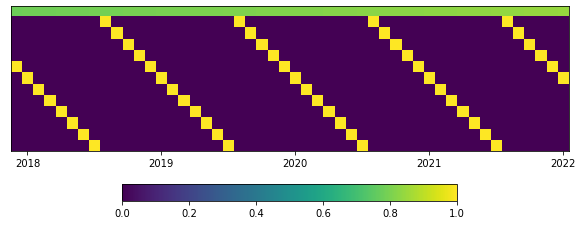

In [106]:
_, ax = plt.subplots(figsize=(10, 4))
x_subset = np.concatenate([trend, seasonality], axis=-1)[-50:]
im = ax.imshow(x_subset.T)

label_loc = np.arange(1, 50, 12)
ax.set_xticks(label_loc)
ax.set_yticks([])
ax.set_xticklabels(co2_by_month.index.year[-50:][label_loc])
fig.colorbar(im, ax=ax, orientation="horizontal", shrink=.6)

plt.savefig("../plots/fig2_sparse_design_matrix.png")

### regression_mode_for_timeseries

In [52]:
@tfd.JointDistributionCoroutine
def ts_regression_model():
    intercept = yield tfd.JointDistributionCoroutine.Root(tfp.distributions.Normal(0., 100., name="intercept"))
    trend_coeff = yield tfd.JointDistributionCoroutine.Root(tfp.distributions.Normal(0., 10., name="trend_coeff"))
    seasonality_coeff = yield tfd.JointDistributionCoroutine.Root(
        tfp.distributions.Sample(tfp.distributions.Normal(0., 1.),
                                 sample_shape=seasonality.shape[-1],
                                 name="seasonality_coeff"))
    noise = yield root(tfd.HalfCauchy(loc=0., scale=5., name="noise_sigma"))
    y_hat = (intercept[..., None] +
             tf.einsum("ij,...->...i", trend, trend_coeff) +
             tf.einsum("ij,...j->...i", seasonality, seasonality_coeff))
    observed = yield tfd.Independent(
        tfp.distributions.Normal(y_hat, noise[..., None]), 
        reinterpreted_batch_ndims=1, 
        name="observed")

In [107]:
# check shape
ts_regression_model.log_prob_parts(ts_regression_model.sample(4))

StructTuple(
  intercept=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-5.563632 , -6.204848 , -6.5787463, -5.5700502], dtype=float32)>,
  trend_coeff=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-4.7698994, -3.3008568, -3.3418963, -3.2341087], dtype=float32)>,
  seasonality_coeff=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-18.246273, -19.226383, -18.999302, -16.346687], dtype=float32)>,
  noise_sigma=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-4.4279175, -2.314438 , -9.835389 , -2.2944481], dtype=float32)>,
  observed=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2696.5127, -1578.3378, -4516.3516, -1524.32  ], dtype=float32)>
)

### prior_predictive

In [108]:
prior_samples = ts_regression_model.sample(100)

In [109]:
prior_predictive_timeseries = prior_samples.observed

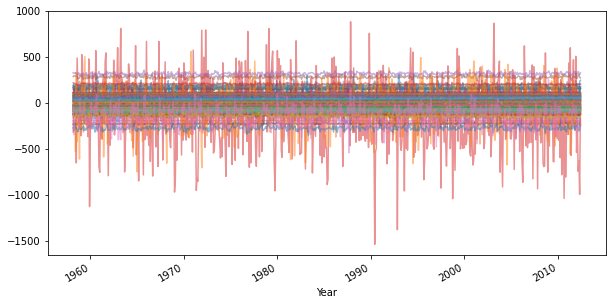

In [111]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(co2_by_month.index[:-num_forecast_steps],
        tf.transpose(prior_predictive_timeseries), alpha=.5)
ax.set_xlabel("Year")
fig.autofmt_xdate()

plt.savefig("../plots/fig3_prior_predictive1.png")

### inference_of_regerssion_model

In [112]:
run_mcmc = tf.function(tfp.experimental.mcmc.windowed_adaptive_nuts, autograph=False, jit_compile=True)

In [113]:
%%time
mcmc_samples, sampler_stats = run_mcmc(
    1000, ts_regression_model, n_chains=4, num_adaptation_steps=1000, 
    observed=co2_by_month_training_data["CO2"].values[None, ...])

2022-07-22 16:47:23.878422: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator mcmc_retry_init/assert_equal_1/Assert/AssertGuard/Assert


CPU times: user 44 s, sys: 1.53 s, total: 45.5 s
Wall time: 46.8 s


In [119]:
mcmc_samples

StructTuple(
  intercept=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[308.5675 , 308.00256, 308.4091 , 308.53162],
           [308.6004 , 308.23944, 307.95627, 308.41797],
           [308.5106 , 308.33194, 308.31982, 308.61847],
           ...,
           [308.62875, 308.34088, 308.49725, 308.30457],
           [308.96008, 308.54315, 308.6754 , 308.2136 ],
           [308.5514 , 308.59973, 308.57486, 308.22873]], dtype=float32)>,
  trend_coeff=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[94.113235, 94.61671 , 94.5041  , 94.10081 ],
           [94.45859 , 94.60394 , 94.685684, 94.47601 ],
           [94.68667 , 93.89401 , 94.162834, 94.56158 ],
           ...,
           [94.788605, 94.526924, 94.38586 , 93.53775 ],
           [94.33392 , 94.31036 , 94.44838 , 94.69769 ],
           [93.94359 , 94.3037  , 94.79673 , 94.404526]], dtype=float32)>,
  seasonality_coeff=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    array([[[-0.15593478, -0.137

In [120]:
sampler_stats

{'step_size': <tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853, 0.2838853,
        0.2838853, 0.2838853, 0.2838853, 0.283885

In [115]:
co2_by_month_training_data["CO2"].values[None, ...].shape

(1, 652)

In [116]:
regression_idata = az.from_dict(
    posterior={
        # TFP mcmc returns (num_samples, num_chains, ...), we swap 
        # the first and second axis below for each RV so the shape 
        # is what ArviZ expects.
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples._asdict().items()}, 
    sample_stats={
        k:np.swapaxes(sampler_stats[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]})

In [117]:
az.summary(regression_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,308.367,0.364,307.679,309.029,0.010,0.007,1317.0,1889.0,1.0
trend_coeff,94.338,0.446,93.462,95.149,0.006,0.004,5062.0,3179.0,1.0
seasonality_coeff[0],0.008,0.439,-0.804,0.842,0.009,0.007,2249.0,2839.0,1.0
seasonality_coeff[1],0.571,0.439,-0.248,1.427,0.009,0.007,2224.0,2802.0,1.0
seasonality_coeff[2],1.315,0.439,0.489,2.135,0.010,0.007,2090.0,2852.0,1.0
seasonality_coeff[3],2.297,0.449,1.513,3.178,0.009,0.006,2442.0,2874.0,1.0
seasonality_coeff[4],2.674,0.446,1.850,3.512,0.010,0.007,2109.0,2275.0,1.0
seasonality_coeff[5],2.090,0.440,1.263,2.907,0.009,0.007,2168.0,2739.0,1.0
seasonality_coeff[6],0.614,0.451,-0.298,1.377,0.010,0.007,2245.0,2715.0,1.0
seasonality_coeff[7],-1.244,0.444,-2.067,-0.424,0.009,0.006,2343.0,2768.0,1.0


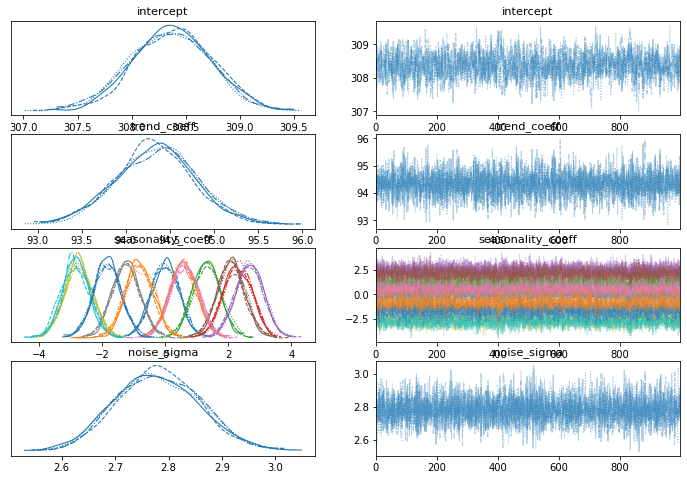

In [118]:
axes = az.plot_trace(regression_idata, compact=True);

### posterior_predictive_with_component

#### We can draw posterior predictive sample with jd.sample_distributions()

##### ts_regression_model coroutine refers to trend and seasonaliity, which have the size of training data, 
##### create another coroutine referring to trend_all and seasonality all. 

##### Note: This breaks training on training data and testing on testing data, so, it defeats the purpose of forecasting. But this is for learning how to use Tensorflow Probability and plotting accordingly. 

In [188]:
@tfd.JointDistributionCoroutine
def ts_regression_model_all():
    intercept = yield tfd.JointDistributionCoroutine.Root(tfp.distributions.Normal(0., 100., name="intercept"))
    trend_coeff = yield tfd.JointDistributionCoroutine.Root(tfp.distributions.Normal(0., 10., name="trend_coeff"))
    seasonality_coeff = yield tfd.JointDistributionCoroutine.Root(
        tfp.distributions.Sample(tfp.distributions.Normal(0., 1.),
                                 sample_shape=seasonality_all.shape[-1],
                                 name="seasonality_coeff"))
    noise = yield root(tfd.HalfCauchy(loc=0., scale=5., name="noise_sigma"))
    y_hat = (intercept[..., None] +
             tf.einsum("ij,...->...i", trend_all, trend_coeff) +
             tf.einsum("ij,...j->...i", seasonality_all, seasonality_coeff))
    observed = yield tfd.Independent(
        tfp.distributions.Normal(y_hat, noise[..., None]), 
        reinterpreted_batch_ndims=1, 
        name="observed")

In [189]:
%%time
mcmc_samples_all, sampler_stats_all = run_mcmc(
    1000, ts_regression_model_all, n_chains=4, num_adaptation_steps=1000,
    observed=co2_by_month["CO2"].values[None, ...])

2022-07-22 18:38:51.612959: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator mcmc_retry_init/assert_equal_1/Assert/AssertGuard/Assert


CPU times: user 59.6 s, sys: 2.11 s, total: 1min 1s
Wall time: 1min 11s


In [190]:
posterior_dist_direct, posterior_and_predictive_direct = ts_regression_model_all.sample_distributions(
      value=mcmc_samples_all)

In [191]:
posterior_dist_direct

StructTuple(
  intercept=<tfp.distributions.Normal 'intercept' batch_shape=[] event_shape=[] dtype=float32>,
  trend_coeff=<tfp.distributions.Normal 'trend_coeff' batch_shape=[] event_shape=[] dtype=float32>,
  seasonality_coeff=<tfp.distributions.Sample 'seasonality_coeff' batch_shape=[] event_shape=[12] dtype=float32>,
  noise_sigma=<tfp.distributions.HalfCauchy 'noise_sigma' batch_shape=[] event_shape=[] dtype=float32>,
  observed=<tfp.distributions.Independent 'observed' batch_shape=[1000, 4] event_shape=[772] dtype=float32>
)

In [192]:
posterior_and_predictive_direct

StructTuple(
  intercept=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[305.27667, 305.1709 , 305.81213, 305.35257],
           [305.9727 , 305.9786 , 305.84872, 306.40338],
           [305.31412, 305.9249 , 305.98306, 306.4418 ],
           ...,
           [305.90408, 305.8422 , 304.8143 , 305.6158 ],
           [305.76212, 305.61316, 305.0868 , 305.66595],
           [305.72015, 306.1328 , 305.9894 , 305.6528 ]], dtype=float32)>,
  trend_coeff=<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
    array([[103.37317 , 103.323586, 103.55548 , 103.88422 ],
           [102.15014 , 103.17107 , 103.02401 , 102.6355  ],
           [104.27095 , 103.60575 , 102.78891 , 102.58955 ],
           ...,
           [102.4204  , 103.3457  , 103.4602  , 102.863846],
           [102.777084, 103.93327 , 102.879486, 102.75751 ],
           [103.09115 , 103.196144, 103.72197 , 103.93305 ]], dtype=float32)>,
  seasonality_coeff=<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
    arra

In [193]:
posterior_predictive_samples_direct = posterior_and_predictive_direct[-1]

In [194]:
posterior_predictive_samples_direct

<tf.Tensor: shape=(1000, 4, 772), dtype=float32, numpy=
array([[[294.2325 , 305.15665, 308.4343 , ..., 413.7102 , 405.93768,
         400.4258 ],
        [318.1724 , 312.0378 , 309.38898, ..., 407.774  , 411.8767 ,
         404.13574],
        [313.54483, 314.4956 , 306.7812 , ..., 417.19632, 404.41367,
         414.87247],
        [311.762  , 315.86945, 313.44238, ..., 419.2894 , 416.113  ,
         415.89075]],

       [[309.5272 , 313.30875, 309.8111 , ..., 413.62354, 404.09155,
         417.09714],
        [313.62027, 307.91415, 310.1004 , ..., 404.9278 , 404.3829 ,
         412.049  ],
        [309.17624, 307.77597, 307.13724, ..., 408.49573, 405.5298 ,
         410.3511 ],
        [311.43192, 306.33286, 306.53372, ..., 417.71573, 407.44247,
         412.6636 ]],

       [[305.1926 , 303.67776, 308.77844, ..., 411.16055, 413.47708,
         410.61453],
        [302.0494 , 309.43707, 310.66458, ..., 420.9367 , 421.12076,
         411.90817],
        [308.60083, 308.80902, 304.24597

In [195]:
posterior_predictive_samples_direct.shape

TensorShape([1000, 4, 772])

In [196]:
posterior_predictive_dist_direct = posterior_dist_direct[-1]

In [197]:
posterior_predictive_dist_direct

<tfp.distributions.Independent 'observed' batch_shape=[1000, 4] event_shape=[772] dtype=float32>

In [198]:
sample_shape_direct = posterior_predictive_samples_direct.shape[:-1]

In [199]:
sample_shape_direct

TensorShape([1000, 4])

In [200]:
tf.math.reduce_prod(sample_shape_direct)

<tf.Tensor: shape=(), dtype=int32, numpy=4000>

In [203]:
tf.reshape(posterior_predictive_samples_direct,
           [tf.math.reduce_prod(sample_shape_direct), -1])

<tf.Tensor: shape=(4000, 772), dtype=float32, numpy=
array([[294.2325 , 305.15665, 308.4343 , ..., 413.7102 , 405.93768,
        400.4258 ],
       [318.1724 , 312.0378 , 309.38898, ..., 407.774  , 411.8767 ,
        404.13574],
       [313.54483, 314.4956 , 306.7812 , ..., 417.19632, 404.41367,
        414.87247],
       ...,
       [303.3662 , 300.11365, 309.79184, ..., 411.2963 , 411.19568,
        408.7493 ],
       [308.75528, 307.37137, 310.89487, ..., 409.37732, 404.27356,
        411.26074],
       [301.05972, 307.074  , 310.31302, ..., 407.57126, 414.83353,
        408.75458]], dtype=float32)>

In [204]:
tf.transpose(tf.reshape(posterior_predictive_samples_direct,
                        [tf.math.reduce_prod(sample_shape_direct), -1]))

<tf.Tensor: shape=(772, 4000), dtype=float32, numpy=
array([[294.2325 , 318.1724 , 313.54483, ..., 303.3662 , 308.75528,
        301.05972],
       [305.15665, 312.0378 , 314.4956 , ..., 300.11365, 307.37137,
        307.074  ],
       [308.4343 , 309.38898, 306.7812 , ..., 309.79184, 310.89487,
        310.31302],
       ...,
       [413.7102 , 407.774  , 417.19632, ..., 411.2963 , 409.37732,
        407.57126],
       [405.93768, 411.8767 , 404.41367, ..., 411.19568, 404.27356,
        414.83353],
       [400.4258 , 404.13574, 414.87247, ..., 408.7493 , 411.26074,
        408.75458]], dtype=float32)>

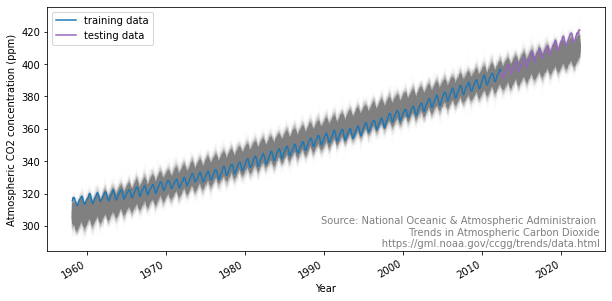

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(co2_by_month.index,
        tf.transpose(tf.reshape(posterior_predictive_samples_direct,
                                [tf.math.reduce_prod(sample_shape_direct), -1]))[:, :500],
        color='gray', alpha=.01)
plot_co2_data((fig, ax))
plt.savefig("../plots/posterior_predictive_direct_1.png")

#### Since we want to also plot the posterior predictive distribution for
#### each components, conditioned on both training and testing data, we
#### construct the posterior predictive distribution as below:

In [151]:
nchains = regression_idata.posterior.dims["chain"]

In [152]:
nchains

4

In [153]:
mcmc_samples.trend_coeff

<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
array([[94.113235, 94.61671 , 94.5041  , 94.10081 ],
       [94.45859 , 94.60394 , 94.685684, 94.47601 ],
       [94.68667 , 93.89401 , 94.162834, 94.56158 ],
       ...,
       [94.788605, 94.526924, 94.38586 , 93.53775 ],
       [94.33392 , 94.31036 , 94.44838 , 94.69769 ],
       [93.94359 , 94.3037  , 94.79673 , 94.404526]], dtype=float32)>

In [154]:
trend_posterior = mcmc_samples.intercept + \
    tf.einsum("ij,...->i...", trend_all, mcmc_samples.trend_coeff)

In [155]:
trend_posterior

<tf.Tensor: shape=(772, 1000, 4), dtype=float32, numpy=
array([[[308.5675 , 308.00256, 308.4091 , 308.53162],
        [308.6004 , 308.23944, 307.95627, 308.41797],
        [308.5106 , 308.33194, 308.31982, 308.61847],
        ...,
        [308.62875, 308.34088, 308.49725, 308.30457],
        [308.96008, 308.54315, 308.6754 , 308.2136 ],
        [308.5514 , 308.59973, 308.57486, 308.22873]],

       [[308.68958, 308.12527, 308.53165, 308.65366],
        [308.72293, 308.36215, 308.07907, 308.5405 ],
        [308.6334 , 308.45374, 308.44196, 308.74112],
        ...,
        [308.7517 , 308.46347, 308.61966, 308.42587],
        [309.08243, 308.66547, 308.7979 , 308.33643],
        [308.67325, 308.72205, 308.6978 , 308.35117]],

       [[308.81165, 308.24802, 308.65424, 308.77573],
        [308.84543, 308.48483, 308.20187, 308.66306],
        [308.7562 , 308.5755 , 308.5641 , 308.86377],
        ...,
        [308.87463, 308.5861 , 308.7421 , 308.5472 ],
        [309.2048 , 308.7878 , 308.92

In [156]:
mcmc_samples.seasonality_coeff

<tf.Tensor: shape=(1000, 4, 12), dtype=float32, numpy=
array([[[-0.15593478, -0.13707265,  0.9839258 , ..., -3.2102377 ,
         -1.8539618 , -1.2110184 ],
        [-0.25165635,  0.47370404,  1.606068  , ..., -2.6155055 ,
         -1.9717994 , -0.3115488 ],
        [ 0.03058469,  0.8084876 ,  1.0371568 , ..., -2.4763172 ,
         -1.8103864 , -0.92460173],
        [-0.00490643,  0.15108661,  1.5284191 , ..., -3.1381083 ,
         -1.8796738 , -1.47112   ]],

       [[-0.352017  ,  0.44609845,  1.8986063 , ..., -2.9077847 ,
         -1.7602358 , -0.70759827],
        [-0.38802806,  0.79010355,  1.202649  , ..., -2.4567106 ,
         -2.1404927 , -0.5928937 ],
        [ 0.3739851 ,  0.5023329 ,  1.2748901 , ..., -2.6612124 ,
         -1.8173493 , -0.40029097],
        [-0.37153608,  0.22534397,  1.2784728 , ..., -3.3943934 ,
         -1.1572084 , -0.80578554]],

       [[ 0.49224687,  0.3942528 ,  0.9757605 , ..., -3.2557423 ,
         -1.7338933 , -1.212331  ],
        [ 0.47704348,  

In [157]:
seasonality_posterior = tf.einsum(
    "ij,...j->i...", seasonality_all, mcmc_samples.seasonality_coeff)

In [158]:
seasonality_posterior

<tf.Tensor: shape=(772, 1000, 4), dtype=float32, numpy=
array([[[0.9839258 , 1.606068  , 1.0371568 , 1.5284191 ],
        [1.8986063 , 1.202649  , 1.2748901 , 1.2784728 ],
        [0.9757605 , 1.7345124 , 1.2122437 , 0.7916069 ],
        ...,
        [0.5712327 , 0.95023763, 1.0227416 , 2.3923955 ],
        [0.7217726 , 1.2246284 , 1.9079959 , 0.82230794],
        [1.4966613 , 1.2118615 , 1.3377535 , 1.9239732 ]],

       [[2.5930161 , 2.6878493 , 2.4187388 , 2.0291476 ],
        [2.3983757 , 2.0363374 , 2.726383  , 2.6381795 ],
        [1.7605042 , 2.5705764 , 2.0287416 , 1.4432644 ],
        ...,
        [2.1206083 , 1.8284036 , 1.9842042 , 2.5245843 ],
        [1.6105721 , 2.4336135 , 2.0305748 , 2.5005403 ],
        [2.2987466 , 2.2080338 , 1.642493  , 2.258122  ]],

       [[2.948436  , 2.9210293 , 2.2362568 , 2.7377422 ],
        [2.0254946 , 2.7686584 , 2.8026118 , 1.7250931 ],
        [3.333883  , 2.9437563 , 3.0928602 , 2.7457702 ],
        ...,
        [2.16333   , 2.24096   

In [159]:
y_hat = trend_posterior + seasonality_posterior

In [160]:
y_hat

<tf.Tensor: shape=(772, 1000, 4), dtype=float32, numpy=
array([[[309.55142, 309.60864, 309.44626, 310.06003],
        [310.49902, 309.44208, 309.23117, 309.69644],
        [309.48636, 310.06647, 309.53207, 309.41006],
        ...,
        [309.19998, 309.2911 , 309.52   , 310.69696],
        [309.68185, 309.7678 , 310.5834 , 309.0359 ],
        [310.04807, 309.81158, 309.91263, 310.1527 ]],

       [[311.2826 , 310.8131 , 310.95038, 310.6828 ],
        [311.1213 , 310.3985 , 310.80545, 311.17868],
        [310.3939 , 311.02432, 310.4707 , 310.1844 ],
        ...,
        [310.8723 , 310.29187, 310.60385, 310.95047],
        [310.693  , 311.0991 , 310.8285 , 310.83698],
        [310.972  , 310.93008, 310.3403 , 310.60928]],

       [[311.76007, 311.16904, 310.8905 , 311.51346],
        [310.8709 , 311.25348, 311.0045 , 310.38815],
        [312.0901 , 311.51926, 311.65695, 311.60953],
        ...,
        [311.03796, 310.82706, 311.33713, 311.12103],
        [311.06506, 311.51923, 311.27

In [161]:
mcmc_samples.noise_sigma

<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
array([[2.7660677, 2.868197 , 2.8445845, 2.704349 ],
       [2.821927 , 2.797118 , 2.889051 , 2.9071965],
       [2.7366745, 2.8898957, 2.951312 , 2.8290796],
       ...,
       [2.8757699, 2.7961464, 2.762567 , 2.7483044],
       [2.791786 , 2.8431673, 2.7328854, 2.895606 ],
       [2.7760372, 2.7984586, 2.8566875, 2.8133576]], dtype=float32)>

In [162]:
posterior_predictive_dist = tfp.distributions.Normal(y_hat, mcmc_samples.noise_sigma)

In [163]:
posterior_predictive_dist

<tfp.distributions.Normal 'Normal' batch_shape=[772, 1000, 4] event_shape=[] dtype=float32>

In [164]:
posterior_predictive_samples = posterior_predictive_dist.sample()

In [165]:
posterior_predictive_samples

<tf.Tensor: shape=(772, 1000, 4), dtype=float32, numpy=
array([[[314.9103 , 306.707  , 312.4284 , 301.71066],
        [304.15237, 307.97037, 314.39685, 311.36533],
        [308.42862, 307.97977, 307.7424 , 309.38257],
        ...,
        [308.8548 , 310.27768, 302.7984 , 313.72464],
        [310.17242, 312.05725, 308.28592, 312.925  ],
        [312.96716, 309.17908, 304.61475, 311.6419 ]],

       [[308.12103, 315.23907, 309.63617, 310.1117 ],
        [309.00195, 311.69696, 311.89825, 314.19925],
        [308.0815 , 309.7285 , 310.79633, 304.9183 ],
        ...,
        [315.48907, 312.23944, 312.1463 , 309.19632],
        [309.0962 , 309.00482, 309.05832, 308.79443],
        [313.01804, 305.8577 , 310.07785, 310.95544]],

       [[315.19894, 306.92514, 305.676  , 312.65186],
        [308.29196, 311.04242, 316.99   , 314.1373 ],
        [315.84247, 309.28003, 313.6962 , 312.47675],
        ...,
        [310.1053 , 309.27274, 309.43765, 309.1295 ],
        [315.5723 , 311.7642 , 310.98

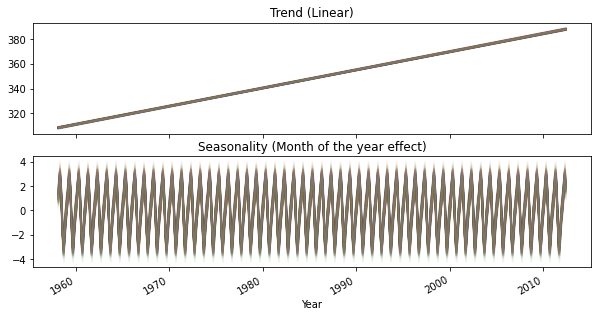

In [166]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
for i in range(nchains):
    ax[0].plot(co2_by_month.index[:-num_forecast_steps],
               trend_posterior[:-num_forecast_steps, -100:, i], alpha=.05)
    ax[1].plot(co2_by_month.index[:-num_forecast_steps],
               seasonality_posterior[:-num_forecast_steps, -100:, i], alpha=.05)

ax[0].set_title('Trend (Linear)')
ax[1].set_title('Seasonality (Month of the year effect)')
ax[1].set_xlabel("Year")
fig.autofmt_xdate()

plt.savefig("../plots/posterior_predictive_components1.png")

In [167]:
sample_shape = posterior_predictive_samples.shape[1:]

In [168]:
sample_shape

TensorShape([1000, 4])

In [169]:
tf.math.reduce_prod(sample_shape)

<tf.Tensor: shape=(), dtype=int32, numpy=4000>

In [170]:
[-1, tf.math.reduce_prod(sample_shape)]

[-1, <tf.Tensor: shape=(), dtype=int32, numpy=4000>]

In [171]:
tf.reshape(posterior_predictive_samples,
           [-1, tf.math.reduce_prod(sample_shape)])

<tf.Tensor: shape=(772, 4000), dtype=float32, numpy=
array([[314.9103 , 306.707  , 312.4284 , ..., 309.17908, 304.61475,
        311.6419 ],
       [308.12103, 315.23907, 309.63617, ..., 305.8577 , 310.07785,
        310.95544],
       [315.19894, 306.92514, 305.676  , ..., 316.09137, 307.95694,
        309.09012],
       ...,
       [409.21533, 404.2738 , 405.88272, ..., 402.31512, 400.4467 ,
        409.03082],
       [408.56735, 404.875  , 404.49316, ..., 402.3098 , 405.51978,
        406.74326],
       [400.28915, 404.4138 , 404.33984, ..., 400.18134, 404.7702 ,
        403.21094]], dtype=float32)>

In [173]:
tf.reshape(posterior_predictive_samples,
           [-1, tf.math.reduce_prod(sample_shape)])[0]

<tf.Tensor: shape=(4000,), dtype=float32, numpy=
array([314.9103 , 306.707  , 312.4284 , ..., 309.17908, 304.61475,
       311.6419 ], dtype=float32)>

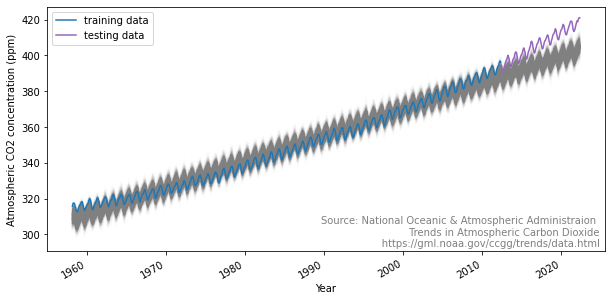

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(co2_by_month.index,
        tf.reshape(posterior_predictive_samples,
                   [-1, tf.math.reduce_prod(sample_shape)])[:, :500],
        color='gray', alpha=.01)
plot_co2_data((fig, ax))
plt.savefig("../plots/posterior_predictive1.png")